In [ ]:
!pip install wordcloud
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install spacy

In [2]:
import gdown
import pandas as pd

# URL Google Drive
url = "https://drive.google.com/uc?export=download&id=1UR_MC8Q5K4JSRnSUX5MQ-sIGPjLLnm9f"

#output = "data.csv"
#gdown.download(url, output, quiet=False, fuzzy=True)

# Charger le fichier CSV
df = pd.read_csv(output)

# Vérifier les premières lignes
print(df.head())


                                         identifiant    journal journal_clean  \
0  4e1a85867f3ab0b0c169e743745bcbf56be622f879f87f...  Sud Ouest     Sud Ouest   
1  c651038ff3e564f20f33c42baf93ec7705da83241db7cc...  Sud Ouest     Sud Ouest   
2  89c84d8d9d1bd2cbccf227d3174b460119aef370308d1a...  Sud Ouest     Sud Ouest   
3  6a3e05da14fd03e838d45b53e93f0ee88aedb74d387d18...  Sud Ouest     Sud Ouest   
4  a7f66fb8536a970383ff1949c9da7b0695ff381254b2af...  Sud Ouest     Sud Ouest   

                                               titre  \
0  [GIRONDE BORDEAUX ASSISES BLANQUEFORT Mauvais...]   
1    [• Jeudi 22 février 1990:53'Jour de l'année...]   
2  [TV/SAMEDI 10 MARS * • à ne pas manquer * * in...   
3  [TÉLÉVISION ic Sports 3 Dimanche » arrive ^ Os...   
4           [GIRONDE TUSTICE SANTÉ Michel Naphle...]   

                                          complement  annee  mois  jour  \
0  Bordeaux,         mercredi 17 janvier 1990 313...   1990     1    17   
1  Bordeaux,         jeudi

In [3]:
column_names = df.columns.tolist()
print(column_names)

['identifiant', 'journal', 'journal_clean', 'titre', 'complement', 'annee', 'mois', 'jour', 'heure', 'minute', 'seconde', 'date', 'epoch', 'auteur', 'texte', 'keywords', 'langue', 'url']


In [4]:
new_df=df.drop(columns=['identifiant','heure','minute','seconde','date','epoch','auteur','langue','url','journal','complement'])

In [5]:
print(new_df.tail(10))

               journal_clean  \
82202  Yahoo! Finance France   
82203             Nice-Matin   
82204              Sud Ouest   
82205              Sud Ouest   
82206             20 Minutes   
82207                    AFP   
82208             Midi Libre   
82209          L'Indépendant   
82210                 TV Mag   
82211             Midi Libre   

                                                   titre  annee  mois  jour  \
82202  Justice : Enquête après une plainte de Sara Fo...   2024    12     5   
82203  Affaire Adèle Haenel: le réalisateur Christoph...   2024    12     5   
82204  Soupçonné d’un viol, il est interpellé dix moi...   2024    12     5   
82205  Soupçonné d'un viol en pleine rue à Bordeaux, ...   2024    12     5   
82206  Enquête après une plainte de Sara Forestier co...   2024    12     5   
82207  #Metoo français: l'affaire Adèle Haenel devant...   2024    12     5   
82208  "Je sortais d'une chimiothérapie" : une femme ...   2024    12     5   
82209  "C'est c

In [6]:
#Premiers test sur seulement trois journaux

journaux_selectionnes = ["Le Monde", "Le Figaro", "Libération"]
new_df = new_df[new_df["journal_clean"].isin(journaux_selectionnes)]



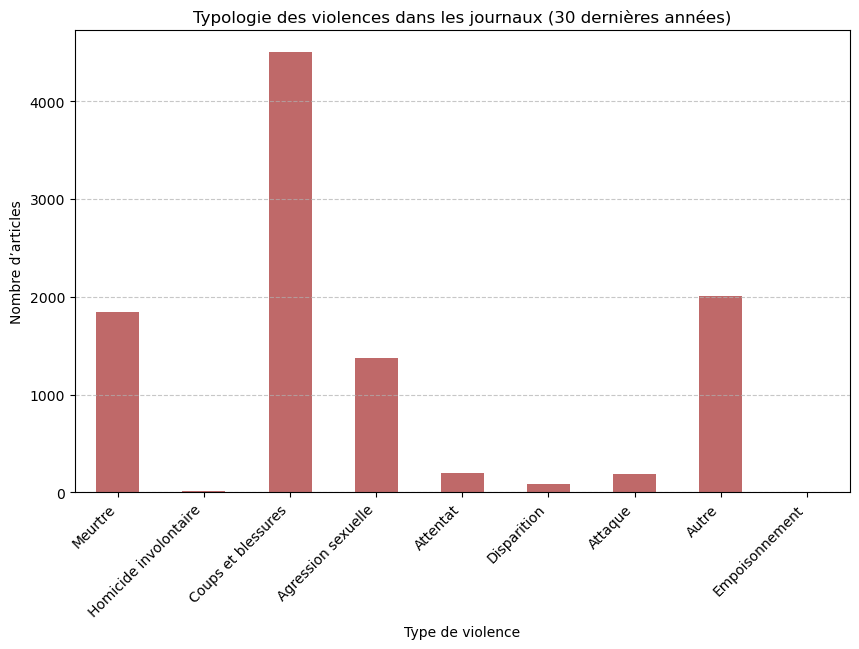

In [12]:
import matplotlib.pyplot as plt
import spacy
#spacy.cli.download("fr_core_news_md")
nlp = spacy.load("fr_core_news_md")


types_violences = {
    'Meurtre': ['meurtre', 'assassinat', 'homicide'],
    'Homicide involontaire': ['homicide involontaire', 'accident mortel'],
    'Coups et blessures': ['agression', 'violence', 'coups', 'blessure'],
    'Agression sexuelle': ['viol', 'harcèlement', 'abus sexuel'],
    'Attentat': ['attentat', 'terrorisme', 'bombe'],
    'Disparition': ['disparition', 'kidnapping', 'enlèvement'],
    'Attaque': ['attaque', 'agression', 'violence armée'],
    'Autre': ['violence', 'abus', 'maltraitance'],
    'Empoisonnement': ['empoisonnement', 'toxicité', 'substance nocive']
}

stop_words='stop_words_fr.txt'

def nettoyer_texte(texte):
    if not isinstance(texte, str):  
        return ""
    texte_doc = nlp(texte.lower())
    mots_pertinents = [token.lemma_ for token in texte_doc if token.text not in stop_words and not token.is_punct]
    return " ".join(mots_pertinents)

docs = list(nlp.pipe(new_df['texte'], batch_size=50, disable=["ner", "parser"]))
new_df['texte_propre'] = [" ".join([token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct]) for doc in docs]


def classifier_article(texte):
    texte_propre = nettoyer_texte(texte)
    for categorie, mots_cles in types_violences.items():
        for mot in mots_cles:
            if mot in texte_propre:
                return categorie
    return 'Autre'


new_df['texte'] = new_df['texte'].fillna("")


new_df['categorie'] = new_df['texte'].apply(classifier_article)

distribution = new_df['categorie'].value_counts()
distribution = distribution.reindex(types_violences.keys(), fill_value=0)


plt.figure(figsize=(10,6))
distribution.plot(kind='bar', color='brown', alpha=0.7)
plt.title('Typologie des violences dans les journaux (30 dernières années)')
plt.xlabel('Type de violence')
plt.ylabel('Nombre d’articles')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


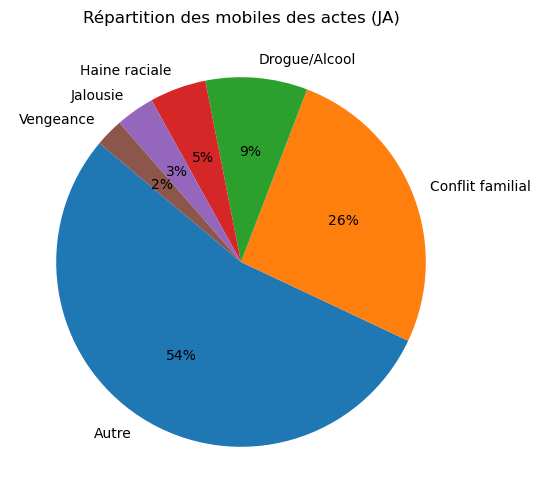

In [20]:
mobiles_violences = {
    'Vengeance': ['vengeance', 'représailles', 'rancune', 'règlement de comptes'],
    'Jalousie': ['jalousie', 'infidélité', 'rivalité', 'trahison'],
    'Drogue/Alcool': ['drogue', 'alcool', 'ivresse', 'stupéfiant'],
    'Conflit familial': ['dispute', 'famille', 'séparation', 'divorce','inceste'],
    'Haine raciale': ['racisme', 'xénophobie', 'homophobie', 'discrimination'],
    'Autre': ['différend', 'querelle', 'inconnu']
}


def classifier_mobile(texte_propre):
    for mobile, mots_cles in mobiles_violences.items():
        for mot in mots_cles:
            if mot in texte_propre:
                return mobile
    return 'Autre'


new_df['mobile'] = new_df['texte_propre'].apply(classifier_mobile)


distribution = new_df['categorie'].value_counts()
distribution = distribution.reindex(types_violences.keys(), fill_value=0)

mobile_counts = new_df['mobile'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(mobile_counts, labels=mobile_counts.index, autopct='%1.0f%%', startangle=140)
plt.title('Répartition des mobiles des actes# Dictionnaire des modes d'identification
')
plt.show()


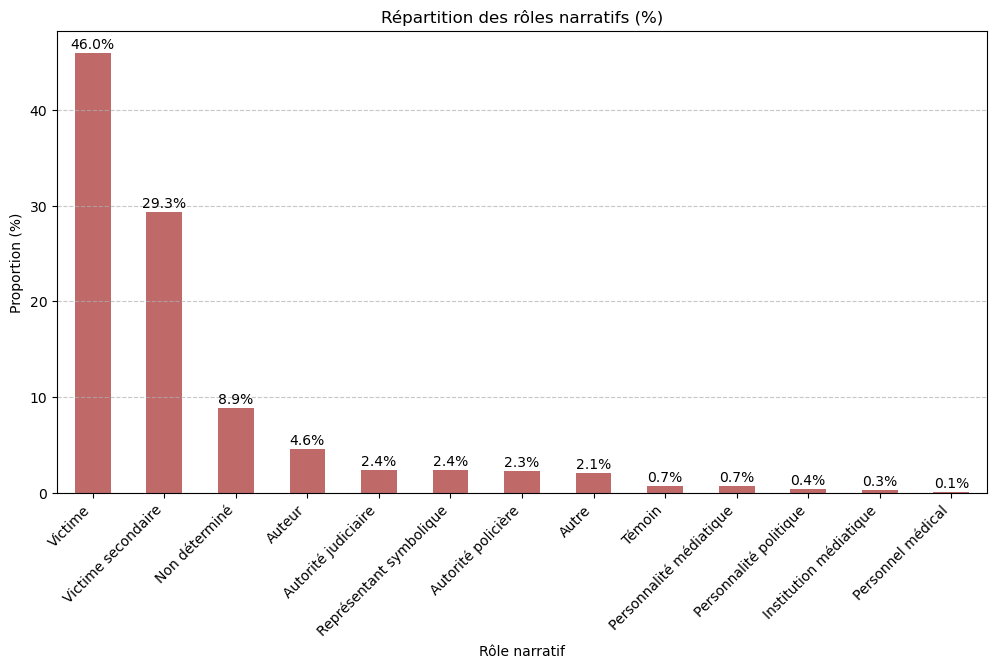

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


roles_narratifs = {
    'Non déterminé': ['indéterminé', 'inconnu'],
    'Victime': ['victime', 'agressé', 'violé'],
    'Victime secondaire': ['famille', 'ami', 'proche'],
    'Témoin': ['témoin', 'observateur', 'déclarant'],
    'Auteur': ['agresseur', 'suspect', 'coupable', 'auteur', 'meurtrier'],
    'Autorité policière': ['policier', 'gendarme', 'police'],
    'Autorité judiciaire': ['juge', 'procureur', 'avocat'],
    'Représentant symbolique': ['président', 'leader', 'chef'],
    'Personnalité médiatique': ['journaliste', 'animateur', 'célébrité'],
    'Personnalité politique': ['ministre', 'député', 'sénateur'],
    'Autre': ['autre', 'divers'],
    'Personnel médical': ['médecin', 'infirmier', 'chirurgien'],
    'Institution médiatique': ['média', 'télévision', 'journal']
}

def classifier_role(texte_propre):
    """
    Classe chaque texte selon son rôle narratif basé sur des mots-clés.
    """
    for role, mots_cles in roles_narratifs.items():
        for mot in mots_cles:
            if mot in texte_propre.lower():  # Ignorer la casse
                return role
    return 'Non déterminé'


new_df['role_narratif'] = new_df['texte_propre'].apply(classifier_role)


role_counts = new_df['role_narratif'].value_counts(normalize=True) * 100


role_counts = role_counts.sort_values(ascending=False)


plt.figure(figsize=(12, 6))
role_counts.plot(kind='bar', color='brown', alpha=0.7)
plt.title('Répartition des rôles narratifs (%)')
plt.xlabel('Rôle narratif')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


for index, value in enumerate(role_counts):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', fontsize=10)

plt.show()



In [ ]:
modes_identification = {
    "Prénom + nom": 'PER',
    'Institution/Collectif': 'ORG',
    'Profession': 'PROFESSION',
    'Anonymisation': ['anonyme', 'non identifié'],
    "Nom d'emprunt": ['alias', 'surnom', 'pseudonyme'],
    'Autre': ['divers', 'autre']
}

def detecter_identification(texte):
    """
    Fonction améliorée pour classifier le mode d'identification avec plus de précision.
    """
    doc = nlp(texte)
    entites = {ent.label_: ent.text.lower() for ent in doc.ents}

    if 'PER' in entites:
        return "Prénom + nom"
    elif 'ORG' in entites:
        return "Institution/Collectif"
    elif any(mot in texte.lower() for mot in modes_identification['Anonymisation']):
        return "Anonymisation"
    elif any(mot in texte.lower() for mot in modes_identification["Nom d'emprunt"]):
        return "Nom d'emprunt"
    elif any(ent.label_ == 'PROFESSION' for ent in doc.ents):
        return "Profession"
    else:
        return "Autre"


new_df['mode_identification'] = new_df['texte_propre'].apply(detecter_identification)


pivot_table = pd.crosstab(new_df['role_narratif'], new_df['mode_identification'], normalize='index') * 100

mode_identification,Anonymisation,Autre,Institution/Collectif,Nom d'emprunt,Prénom + nom
role_narratif,,,,,
Auteur,0.000000,4.496788,3.426124,0.000000,92.077088
Autorité judiciaire,0.000000,0.813008,1.626016,0.000000,97.560976
Autorité policière,0.000000,10.300429,10.300429,0.000000,79.399142
Autre,0.000000,4.225352,4.694836,0.000000,91.079812
Institution médiatique,0.000000,6.896552,3.448276,0.000000,89.655172
Non déterminé,0.110132,9.251101,4.515419,0.000000,86.123348
Personnalité médiatique,0.000000,0.000000,4.411765,0.000000,95.588235
Personnalité politique,0.000000,2.777778,0.000000,0.000000,97.222222
Personnel médical,0.000000,22.222222,0.000000,0.000000,77.777778


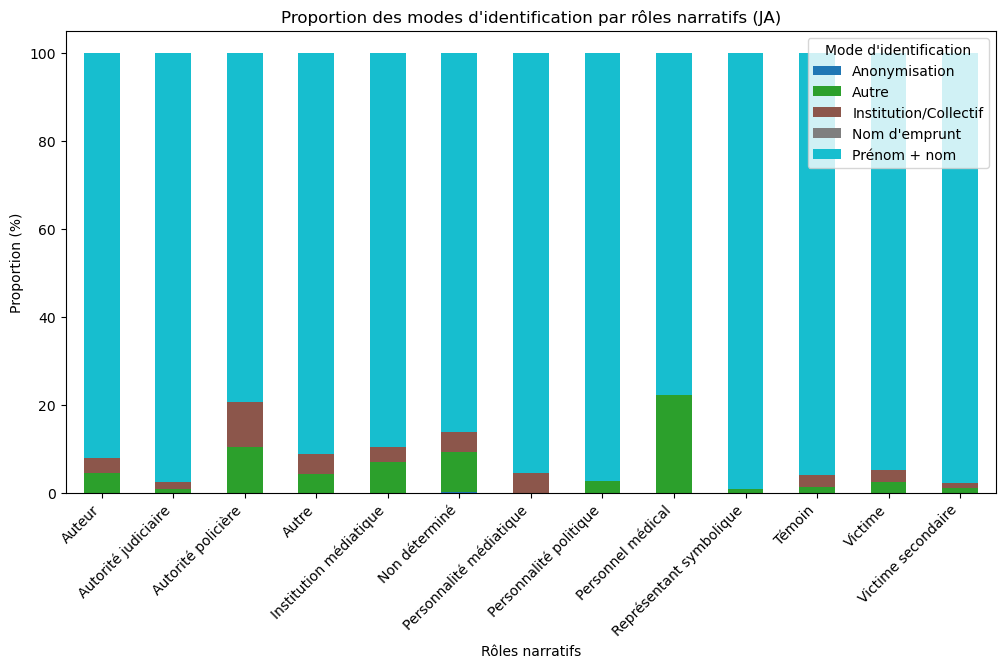

In [28]:

pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title("Proportion des modes d'identification par rôles narratifs (JA)")
plt.xlabel("Rôles narratifs")
plt.ylabel("Proportion (%)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Mode d'identification")
plt.show()


In [30]:

criteres = {
    "Le vocabulaire": {
        "positif": ["violence", "agression", "harcèlement", "viol"],
        "negatif": ["séduction", "amour", "passion"]
    },
    "La description de la victime": {
        "positif": ["témoignage crédible", "respect de la parole"],
        "negatif": ["doute", "provocation"]
    },
    "Les statistiques": {
        "positif": ["selon une étude", "données chiffrées"],
        "negatif": ["aucune statistique"]
    }
}

def evaluer_article(texte):
    """ Évalue un article selon des critères et attribue un score """
    doc = nlp(texte)
    scores = {critere: 0 for critere in criteres}

    for critere, mots in criteres.items():
        if any(mot in texte.lower() for mot in mots["positif"]):
            scores[critere] += 1
        elif any(mot in texte.lower() for mot in mots["negatif"]):
            scores[critere] -= 1

    return scores


scores_articles = new_df['texte_propre'].apply(evaluer_article)


df_scores = pd.DataFrame(scores_articles.tolist())

new_df['score_moyen'] = df_scores.mean(axis=1)


In [31]:
def classifier_article(score_moyen):
    """ Classe un article en fonction de son score moyen """
    if score_moyen > 0.51:
        return "Catégorie 1"
    elif 0.01 <= score_moyen <= 0.5:
        return "Catégorie 2"
    elif -0.49 <= score_moyen <= 0:
        return "Catégorie 3"
    else:
        return "Catégorie 4"

new_df['categorie'] = new_df['score_moyen'].apply(classifier_article)


                                          texte_propre  score_moyen  \
162  Quatre jeune de 19 à 23 an avoir être écrouer ...     0.333333   
164  un femme de 23 an mère de un fillette de 2 an ...     0.333333   
166  le baronne James reine de déjà voir ce rumeur ...     0.000000   
170  le reprise massif de tir serbe sur Sarajevo av...     0.000000   
171  jusque à le réforme de code pénal il y avoir u...     0.000000   

       categorie  
162  Catégorie 2  
164  Catégorie 2  
166  Catégorie 3  
170  Catégorie 3  
171  Catégorie 3  


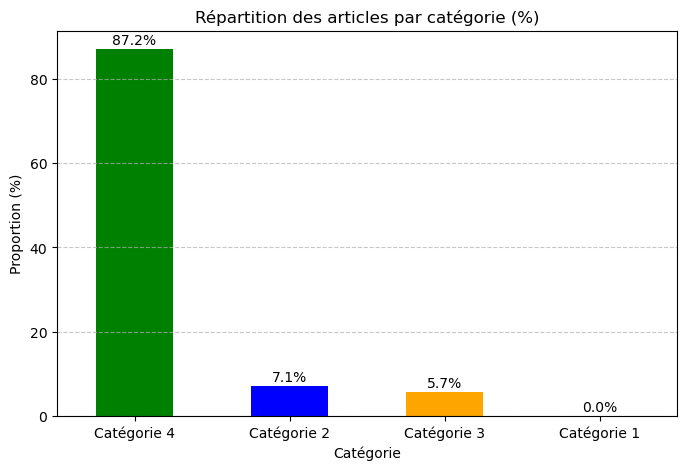

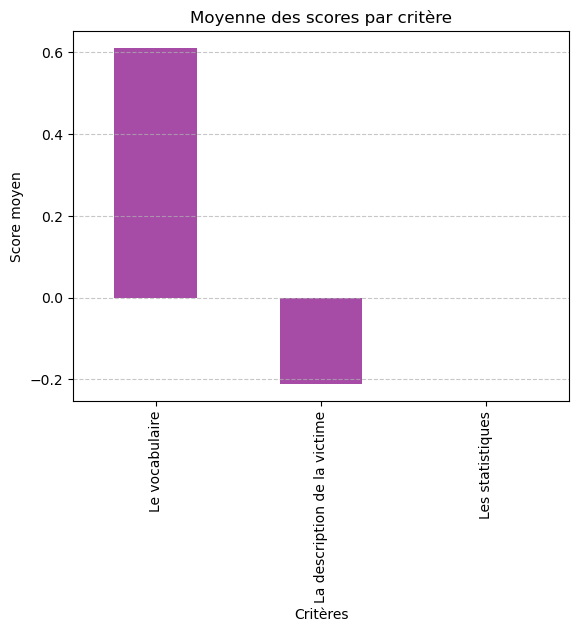

In [32]:
categorie_counts = new_df['categorie'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,5))
categorie_counts.plot(kind='bar', color=['green', 'blue', 'orange', 'red'])
plt.title("Répartition des articles par catégorie (%)")
plt.xlabel("Catégorie")
plt.ylabel("Proportion (%)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for index, value in enumerate(categorie_counts):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center', fontsize=10)

plt.show()
df_scores.mean().plot(kind='bar', color='purple', alpha=0.7)
plt.title("Moyenne des scores par critère")
plt.ylabel("Score moyen")
plt.xlabel("Critères")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
